<a href="https://colab.research.google.com/github/truong220201/appTA/blob/main/B%E1%BA%A3n_sao_c%E1%BB%A7a_demoKPDL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
# dùng để vẽ biểu đồ đếm
from sklearn.linear_model import LinearRegression
# dùng để huấn luyện hồi quy tuyến tính

from sklearn import metrics
# dùng để tính sai số 
from sklearn.preprocessing import MinMaxScaler

from scipy import stats
# tính biểu đồ xác xuất dữ liệu
# 
import plotly.express as px
#các dạng biểu đồ
from sklearn.decomposition import PCA
#phân tích tp chính

In [ ]:
data = pd.read_csv('CAvideos1.csv')
print('Dataset :',data.shape)
data[0:10]

Dataset : (323, 16)


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,NaN,NaN,NaN,Eminem's new track Walk on Water ft. BeyoncÃ© ...
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,NaN,NaN,NaN,STill got a lot of packages. Probably will las...
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,NaN,NaN,NaN,WATCH MY PREVIOUS VIDEO â–¶ \n\nSUBSCRIBE â–º ...
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,NaN,NaN,NaN,I know it's been a while since we did this sho...
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,NaN,NaN,NaN,ðŸŽ§: https://ad.gt/yt-perfect\nðŸ’°: https://...
5,0yIWz1XEeyc,17.14.11,Jake Paul Says Alissa Violet CHEATED with LOGA...,DramaAlert,25,2017-11-13T07:37:51.000Z,"#DramaAlert|""Drama""|""Alert""|""DramaAlert""|""keem...",1309699,103755,4613,12143,https://i.ytimg.com/vi/0yIWz1XEeyc/default.jpg,NaN,NaN,NaN,â–º Follow for News! - https://twitter.com/KEE...
6,_uM5kFfkhB8,17.14.11,Vanoss Superhero School - New Students,VanossGaming,23,2017-11-12T23:52:13.000Z,"Funny Moments|""Montage video games""|""gaming""|""...",2987945,187464,9850,26629,https://i.ytimg.com/vi/_uM5kFfkhB8/default.jpg,NaN,NaN,NaN,Vanoss Merch Shop: https://vanoss.3blackdot.co...
7,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57534,2967,15959,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,NaN,NaN,NaN,SHANTELL'S CHANNEL - https://www.youtube.com/s...
8,JzCsM1vtn78,17.14.11,THE LOGANG MADE HISTORY. LOL. AGAIN.,Logan Paul Vlogs,24,2017-11-12T20:19:24.000Z,"logan paul vlog|""logan paul""|""logan""|""paul""|""o...",4477587,292837,4123,36391,https://i.ytimg.com/vi/JzCsM1vtn78/default.jpg,NaN,NaN,NaN,Join the movement. Be a Maverick â–º https://S...
9,43sm-QwLcx4,17.14.11,Finally Sheldon is winning an argument about t...,Sheikh Musa,22,2017-11-10T14:10:46.000Z,"God|""Sheldon Cooper""|""Young Sheldon""",505161,4135,976,1484,https://i.ytimg.com/vi/43sm-QwLcx4/default.jpg,NaN,NaN,NaN,Sheldon is roasting pastor of the church\nyoun...


In [ ]:
data.describe()
#Phương pháp trả về mô tả dữ liệu trong DataFrame

,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
count,323.000000,3.230000e+02,3.230000e+02,323.000000,323.000000,4.0,2.0,0.0
mean,20.854489,1.171193e+06,4.350331e+04,2618.501548,4881.071207,1.0,1.0,NaN
std,6.694802,3.408184e+06,1.522602e+05,15065.119924,14165.717825,0.0,0.0,NaN
min,1.000000,3.684000e+03,0.000000e+00,0.000000,0.000000,1.0,1.0,NaN
25%,20.000000,1.308305e+05,1.503000e+03,93.000000,323.500000,1.0,1.0,NaN
50%,23.000000,3.411340e+05,9.323000e+03,291.000000,1272.000000,1.0,1.0,NaN
75%,24.000000,9.069270e+05,3.085050e+04,1129.500000,3292.000000,1.0,1.0,NaN
max,43.000000,3.908222e+07,1.721384e+06,200391.000000,125882.000000,1.0,1.0,NaN


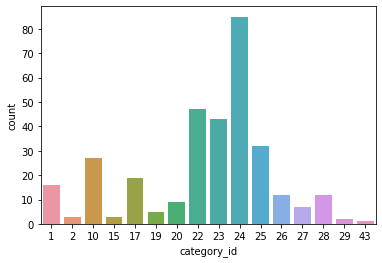

In [ ]:
sns.countplot(x='category_id', data=data ) 
plt.show()
#dùng seaborn với biến số hạng đơn, sử dụng hàm countplot () để vẽ biểu đồ đếm

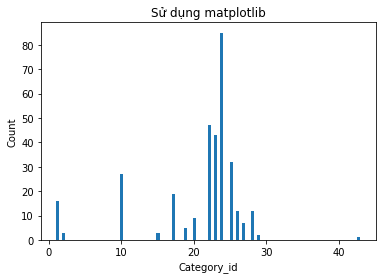

In [ ]:
plt.hist(data['category_id'], bins = 100)
plt.title('Sử dụng matplotlib')
plt.xlabel('Category_id')
plt.ylabel('Count')
plt.show()

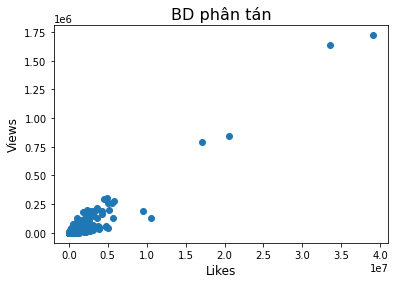

In [ ]:
#Lượt xem(views), Lượt thích(likes)
fig, ax = plt.subplots()
ax.scatter(data['views'], data['likes'])
plt.ylabel('Views', fontsize=12)
plt.xlabel('Likes', fontsize=12)
plt.title('BD phân tán', fontsize=16)
plt.show()

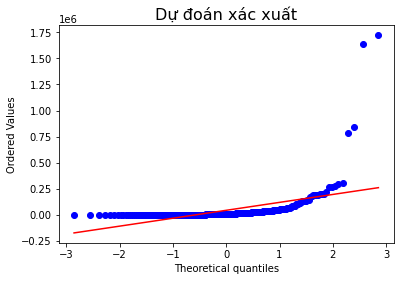

In [ ]:
fig = plt.figure()
ax = fig.add_subplot()
res = stats.probplot(data['likes'], plot=plt)
plt.title('Dự đoán xác xuất', fontsize=16)
plt.show()

In [ ]:
data1 = data.drop(columns=['video_id','trending_date','channel_title','publish_time','title','tags','thumbnail_link','description','comments_disabled','ratings_disabled','ratings_disabled','video_error_or_removed'], axis=1)
#Hàm dropna() áp dụng trên đối tượng DataFrame và được dùng để loại bỏ các ô dữ liệu trống.
data1 = data1.dropna(how='any')
print(data1.shape)

(323, 5)


In [ ]:
print(data1.shape)
data1.head()
# Trả về 5 hàng đầu tiên của dataframe

(323, 5)


,category_id,views,likes,dislikes,comment_count
0,10,17158579,787425,43420,125882
1,23,1014651,127794,1688,13030
2,23,3191434,146035,5339,8181
3,24,2095828,132239,1989,17518
4,10,33523622,1634130,21082,85067


In [ ]:
# gán giá trị X vs y
X= data1[['comment_count', 'views', 'likes','dislikes']]
y= data1['category_id']
print(X)
print("\n")
print(y)

     comment_count     views    likes  dislikes
0           125882  17158579   787425     43420
1            13030   1014651   127794      1688
2             8181   3191434   146035      5339
3            17518   2095828   132239      1989
4            85067  33523622  1634130     21082
..             ...       ...      ...       ...
318            433    347848    10046        84
319           1553    391642     4378       371
320           9107   1663206    38322      3867
321           4523    405955    30369       926
322            782    286273     1264       335

[323 rows x 4 columns]


0      10
1      23
2      23
3      24
4      10
       ..
318    24
319    24
320    28
321    23
322    25
Name: category_id, Length: 323, dtype: int64


In [ ]:
#in số lần giá trị xuất hiện của y
print(y.value_counts())

24    85
22    47
23    43
25    32
10    27
17    19
1     16
26    12
28    12
20     9
27     7
19     5
15     3
2      3
29     2
43     1
Name: category_id, dtype: int64


In [ ]:
# random state là 1 phần thuật toán của scitkit.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1 , random_state=9)

In [ ]:
print('Train set :', X_train.shape, y_train.shape)
print('Train set :', X_test.shape, y_test.shape)

Train set : (290, 4) (290,)
Train set : (33, 4) (33,)


In [ ]:
#Sử dụng kỹ thuật hồi quy Linear Regression để huấn luyện với X_train,y_train.
model_lr = LinearRegression().fit(X_train, y_train)
#LinearRegression

In [ ]:
y_pred = model_lr.predict(X_test)
print(y_pred)


[21.33656839 21.24692971 21.41888886 21.3097772  21.1649767  21.26751868
 17.48322085 21.35674915 21.0228658  21.37107049 21.33894942 16.71555145
 12.16679002 21.30745987 20.54794969 21.24080113 21.36707886 21.41232989
 21.39154139 21.02672931 21.09453353 21.32657476 21.30892866 21.3140238
 21.72635048 20.812378   21.25171412 21.3269387  20.86990249 17.2454009
 21.37284313 21.3044933  21.37341985]


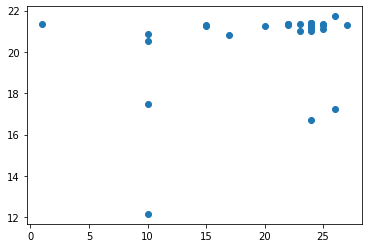

In [ ]:
plt.scatter(y_test, y_pred)
#biểu đồ dự đoán sai số

In [ ]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))

Mean Squared Error: 34.07089623520456


[24 24 23 24 10 22 10 10 22 23 24 17 23 10 10 24 24 23 22 24 17 24 29 17
 23 22 24 24 10 10 23 10 29]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


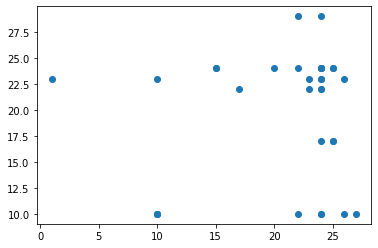

In [ ]:
from sklearn.linear_model import LogisticRegression
#dùng để dự đoán 
# We defining the model
logreg = LogisticRegression(max_iter = 10000)

# We train the model
logreg.fit(X_train, y_train)

# We predict target values
y_predict1 = logreg.predict(X_test)
print(y_predict1)
plt.scatter(y_test, y_predict1)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#In ra kết quả độ chính xác trên từng lớp
print(accuracy_score(y_test, y_predict1))

#In ra ma trận kết quả dự đoán
print(confusion_matrix(y_test, y_predict1))

0.24242424242424243
[[0 0 0 0 0 0 1 0 0 0 0 0]
 [0 3 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 2 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0]
 [0 1 0 0 0 0 0 1 0 0 0 1]
 [0 0 0 0 0 1 1 0 0 0 0 0]
 [0 2 0 1 0 2 2 4 0 0 0 1]
 [0 0 0 2 0 0 0 2 0 0 0 0]
 [0 1 0 0 0 0 1 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


In [ ]:
# 5 Tính  mse 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))

Mean Squared Error: 34.07089623520456


In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_predict1) #Tính ma trận chuẩn hóa
print(cm)

[[0 0 0 0 0 0 1 0 0 0 0 0]
 [0 3 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 2 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0]
 [0 1 0 0 0 0 0 1 0 0 0 1]
 [0 0 0 0 0 1 1 0 0 0 0 0]
 [0 2 0 1 0 2 2 4 0 0 0 1]
 [0 0 0 2 0 0 0 2 0 0 0 0]
 [0 1 0 0 0 0 1 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


In [ ]:
print(X)

     comment_count     views    likes  dislikes
0           125882  17158579   787425     43420
1            13030   1014651   127794      1688
2             8181   3191434   146035      5339
3            17518   2095828   132239      1989
4            85067  33523622  1634130     21082
..             ...       ...      ...       ...
318            433    347848    10046        84
319           1553    391642     4378       371
320           9107   1663206    38322      3867
321           4523    405955    30369       926
322            782    286273     1264       335

[323 rows x 4 columns]


In [ ]:
#vẽ tập dữ liệu X và tâm của 10 cụm
from sklearn.cluster import KMeans
model = KMeans(n_clusters=10, random_state=0).fit(X)
centers = model.cluster_centers_
print(centers)

[[9.99553299e+02 1.87908447e+05 6.21792386e+03 2.99939086e+02]
 [9.03520000e+04 3.90822220e+07 1.72138400e+06 2.31370000e+04]
 [2.65950833e+04 4.97996108e+06 1.86297583e+05 3.48886667e+04]
 [1.24236000e+05 2.05394170e+07 8.40642000e+05 4.77150000e+04]
 [7.95562500e+03 1.73743817e+06 6.37240417e+04 2.92575000e+03]
 [8.50670000e+04 3.35236220e+07 1.63413000e+06 2.10820000e+04]
 [1.11600000e+04 1.00685240e+07 1.61411500e+05 1.19135000e+04]
 [9.67010526e+03 3.08388068e+06 9.69629474e+04 3.77352632e+03]
 [3.66167692e+03 7.81304200e+05 2.94306308e+04 1.02966154e+03]
 [1.25882000e+05 1.71585790e+07 7.87425000e+05 4.34200000e+04]]
